In [18]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sentence_transformers import SentenceTransformer

# Load model and data
model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings_matrix = np.load("discipline_embeddings.npy")  # Precomputed embeddings
df_related_concepts = pd.read_csv("wikidata_disciplines_with_related_concepts.csv")

def find_relevant_concepts(course_description: str, course_name: str, top_n=4):
    if pd.isna(course_description) or not isinstance(course_description, str):
        course_description = course_name  # Fallback to course name

    course_embedding = model.encode([course_description])  # Ensure input is a list
    similarities = cosine_similarity(course_embedding, embeddings_matrix)[0]
    
    df_related_concepts["similarity"] = similarities
    top_disciplines = df_related_concepts.sort_values(by="similarity", ascending=False).head(top_n)
    
    return ";".join(top_disciplines['discipline'].astype(str))  # Ensure string format

# Load course data
df = pd.read_csv("../data/Computer_Science_curriculum.csv", index_col=0)[['course_name', 'program_content']]

# Apply function row-wise
df['similar_fields'] = df.apply(lambda row: find_relevant_concepts(row['program_content'], row['course_name']), axis=1)
df.drop(columns=['program_content']).to_csv("rel.csv")


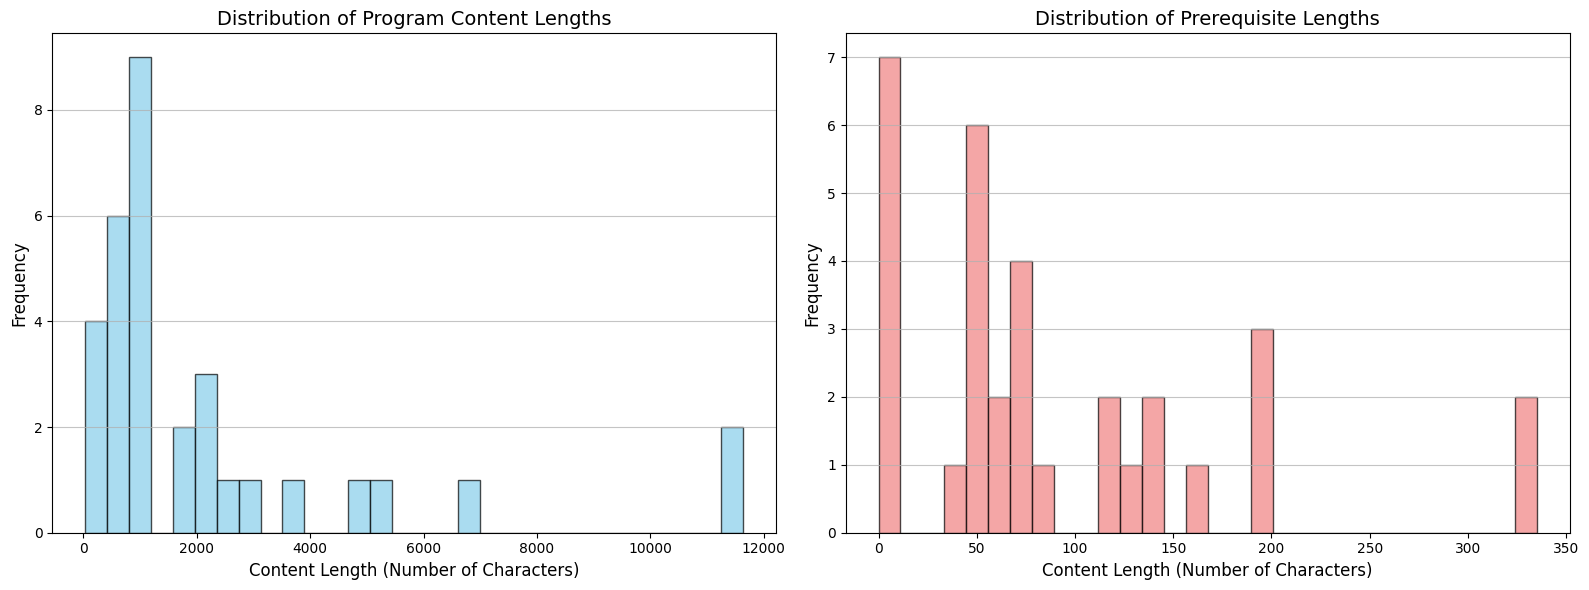

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Computer_Science_curriculum.csv", index_col=0)[["program_content", "prerequisites"]]
def get_length(text):
    if pd.isna(text):
        return 0
    else:
        return len(str(text))

# Apply the function to create the 'program_content_len' column
df["program_content_len"] = df["program_content"].apply(get_length)

# Apply the function to create the 'prerequisites_len' column
df["prerequisites_len"] = df["prerequisites"].apply(get_length)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Adjust figure size for two plots

# Plot 1: Distribution of Program Content Length
axes[0].hist(df["program_content_len"], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Program Content Lengths', fontsize=14)
axes[0].set_xlabel('Content Length (Number of Characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', alpha=0.75)

# Plot 2: Distribution of Prerequisite Length
axes[1].hist(df["prerequisites_len"], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1].set_title('Distribution of Prerequisite Lengths', fontsize=14)
axes[1].set_xlabel('Content Length (Number of Characters)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', alpha=0.75)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

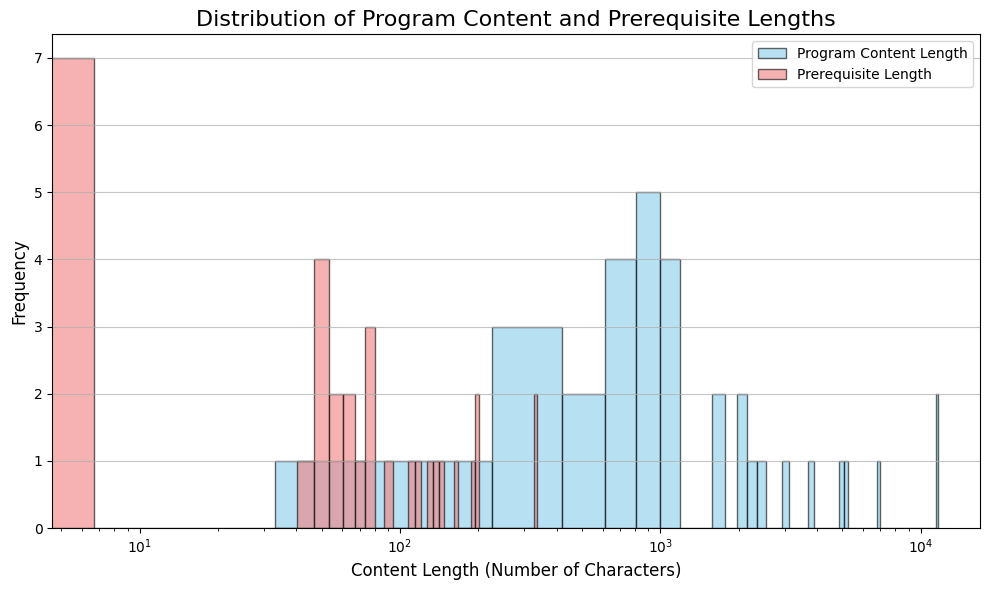

In [ ]:
# Create a single figure for the combined plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# Plot 1: Distribution of Program Content Length
# Use a smaller alpha for transparency when overlapping
plt.hist(df["program_content_len"], bins=60, edgecolor='black', alpha=0.6, color='skyblue', label='Program Content Length')

# Plot 2: Distribution of Prerequisite Length on the same plot
plt.hist(df["prerequisites_len"], bins=50, edgecolor='black', alpha=0.6, color='lightcoral', label='Prerequisite Length')

# Add titles and labels for clarity
plt.title('Distribution of Program Content and Prerequisite Lengths', fontsize=16)
plt.xlabel('Description Length (Number of Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xscale('log')

# Add a legend to distinguish between the two histograms
plt.legend()

# Add a grid for easier reading of values
plt.grid(axis='y', alpha=0.75)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
df

,program_content,prerequisites,program_content_len,prerequisites_len
0,1. Modern computers and their architectures. 2...,General computer literacy. Simple usage of GNU...,1068,112
1,* Introduction to the GNU/Linux system * Worki...,NaN,482,0
2,"Operators, expressions, and statements: The st...",NaN,5207,0
3,Groups: Definitions and examples Basic propert...,Prerequisites and additional requirements not ...,892,55
4,Program of the classes coincides with the prog...,Prerequisites and additional requirements not ...,764,55
5,Modular arithmetic (4h)\nModular arithmetic an...,NaN,1057,0
7,Math versus Phys: Exercises and applications 1...,Background: It will be assumed that the studen...,11636,329
8,"1. Algorithm - basic concepts, algorithms and ...","Mathematical knowledge, (logic, matrices, grap...",2059,66
9,Logic in Computer Science: This is a lecture o...,Can read and write in English; reading English...,900,335
10,Introduction to C++ Flow Control Functions Arr...,- knowledge of C programming language at least...,847,139
